<center>

# Web Intelligence

# Who will win the Tennis Australian Open 2020?

## 04 Validating The Prediction Model

### Riccardo Spolaor (864877)

</center>

In [14]:
%matplotlib inline

import numpy as np
import pandas as pd
import python_files.ValidationOperations as valop

In [15]:
dataframe = pd.read_csv('./datasets/dataframe0.csv', low_memory = False)

In [16]:
dataframe.head(10)

,Winner,csvID,ATP,Location,Tournament,Series,Court,Round,Best of,RankFilledA,...,5_4MeanA,5_5MeanA,5_setsMeanA,5_1MeanB,5_2MeanB,5_3MeanB,5_4MeanB,5_5MeanB,5_setsMeanB,WonRatioVsSameHandedA>WonRatioVsSameHandedB
0,0,0,1.0,2,0,0,1,0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,0,1.0,2,0,0,1,0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,0,1.0,2,0,0,1,0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1,0,1.0,2,0,0,1,0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0,0,1.0,2,0,0,1,0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,1,0,1.0,2,0,0,1,0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0,0,1.0,2,0,0,1,0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,1,0,1.0,2,0,0,1,0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,0,0,1.0,2,0,0,1,0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,1,0,1.0,2,0,0,1,0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Best Max csvID: 0 - Accuracy: 0.7425037918562595
Wall time: 1min 18s


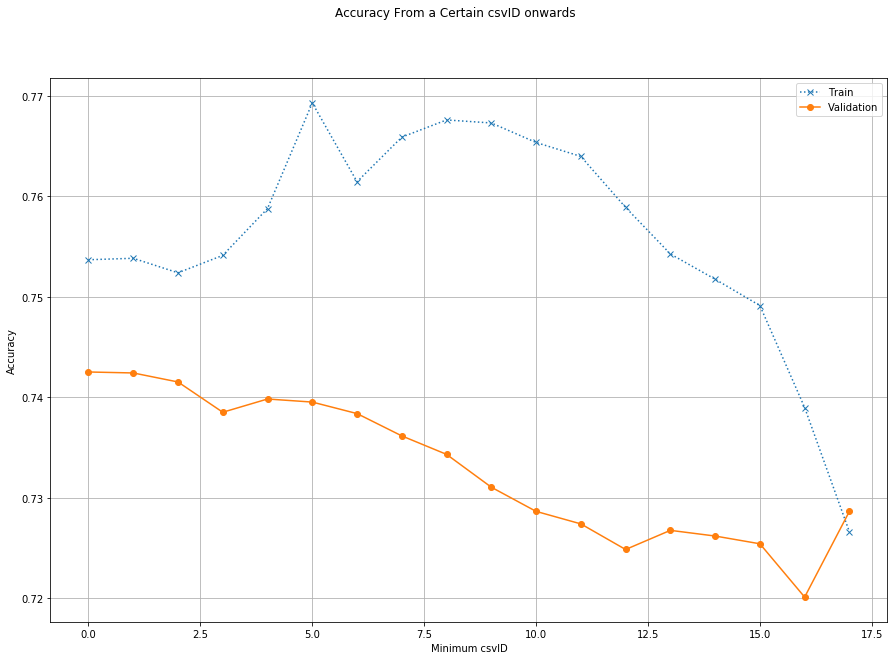

In [17]:
%%time
best_dataframe_split_index = valop.get_best_dataframe_split(dataframe)

In [18]:
dataframe = dataframe[dataframe['csvID'] >= best_dataframe_split_index]

dataframe.head()

,Winner,csvID,ATP,Location,Tournament,Series,Court,Round,Best of,RankFilledA,...,5_4MeanA,5_5MeanA,5_setsMeanA,5_1MeanB,5_2MeanB,5_3MeanB,5_4MeanB,5_5MeanB,5_setsMeanB,WonRatioVsSameHandedA>WonRatioVsSameHandedB
0,0,0,1.0,2,0,0,1,0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,0,1.0,2,0,0,1,0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,0,1.0,2,0,0,1,0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1,0,1.0,2,0,0,1,0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0,0,1.0,2,0,0,1,0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Best Max Depth: 5 - Accuracy: 0.7425037918562595
Best Max Features: 59 - Accuracy: 0.7457122856142807
Wall time: 27.7 s


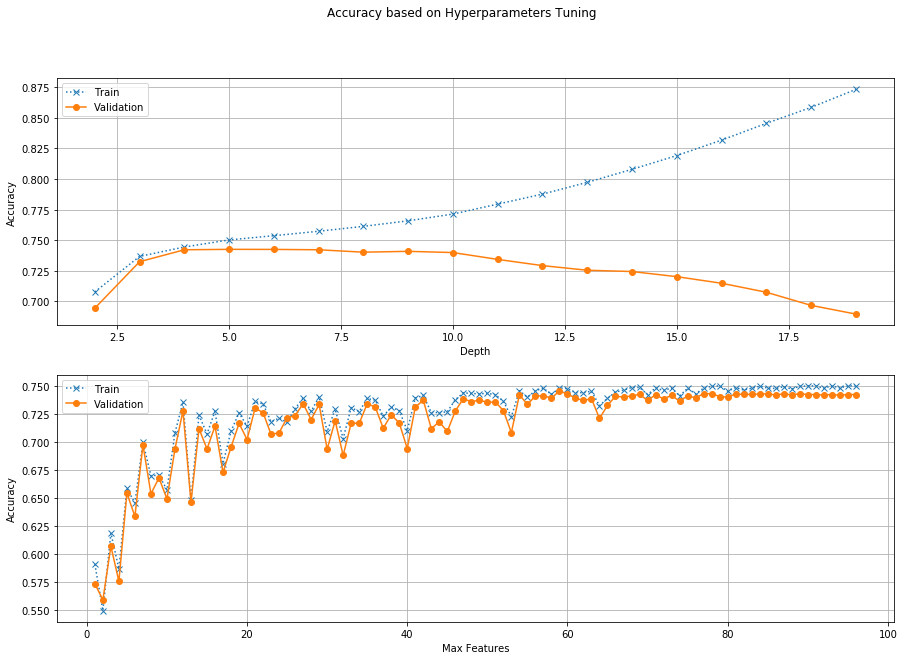

In [19]:
%%time
tree_best_features = valop.validate_tree_classifier(dataframe)

Wall time: 9.45 s


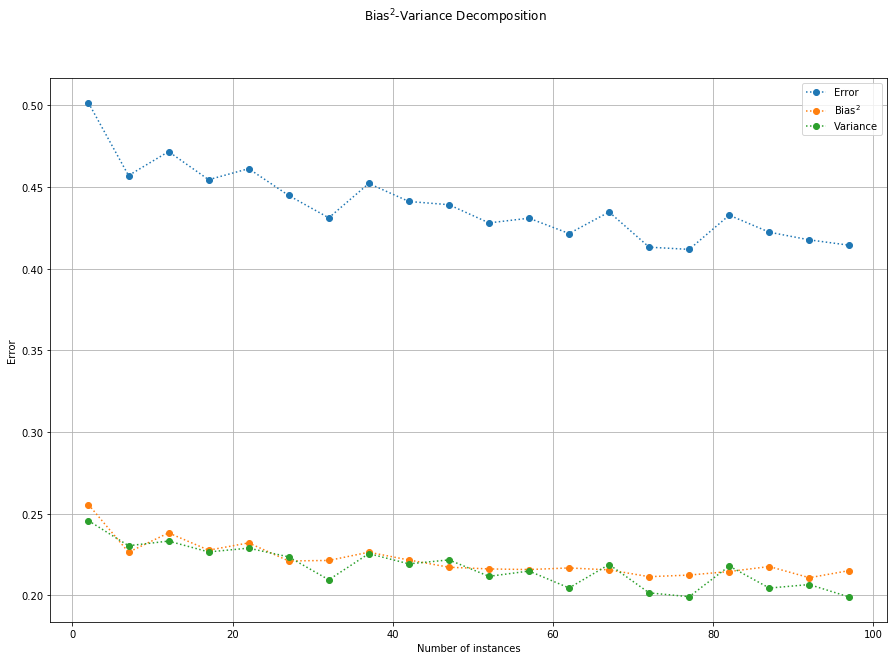

In [20]:
%%time
from sklearn.tree import DecisionTreeClassifier
valop.plot_estimator_variance_bias_decomposition(dataframe, DecisionTreeClassifier(max_depth = tree_best_features['depth'], 
                                                             max_features = tree_best_features['max_features']))

# IL BIAS e LA VARIANZA SONO PIUTTOSTO BASSI PER L'ALBERO CHE ABBIAMO COSTRUITO

Best Number of Estimators: 150 - Accuracy: 0.7429704818574262
Wall time: 2min 51s


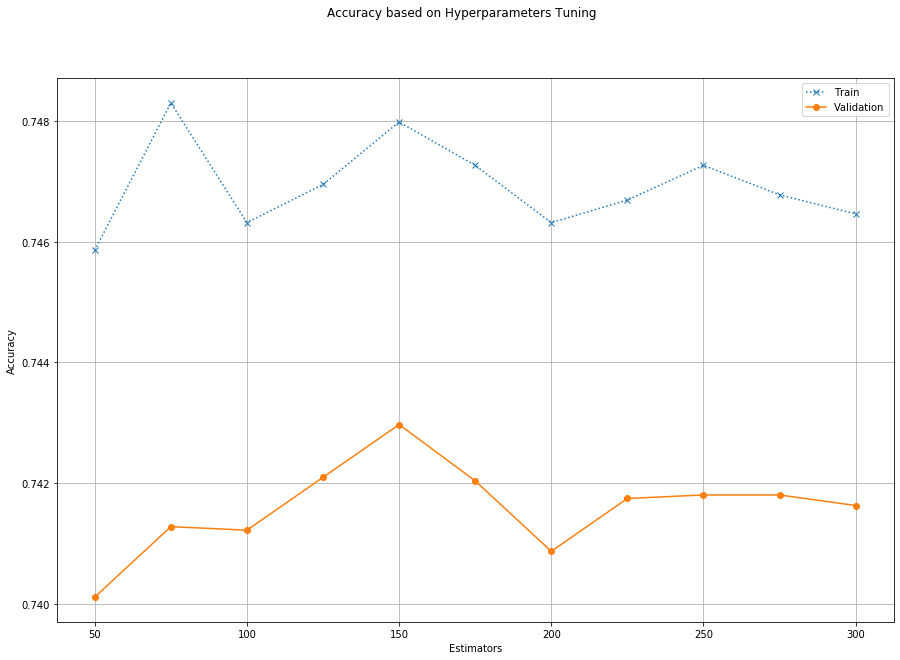

In [21]:
%%time
bagged_tree_best_n_estimators = valop.validate_bagged_tree_classifier(dataframe, tree_best_features)

In [22]:
%%time
from sklearn.ensemble import BaggingClassifier

valop.plot_estimator_variance_bias_decomposition(dataframe,
    BaggingClassifier(DecisionTreeClassifier(max_depth = tree_best_features['depth'],
                                                  max_features = tree_best_features['max_features']), 
                      n_estimators=bagged_tree_best_n_estimators, n_jobs = -1), n_tests = 3)

#IL BAGGING RIDUCE UN PO' LA VARIANZA, MA PARE AUMENTARE IL BIAS

KeyboardInterrupt: 

KeyboardInterrupt: 

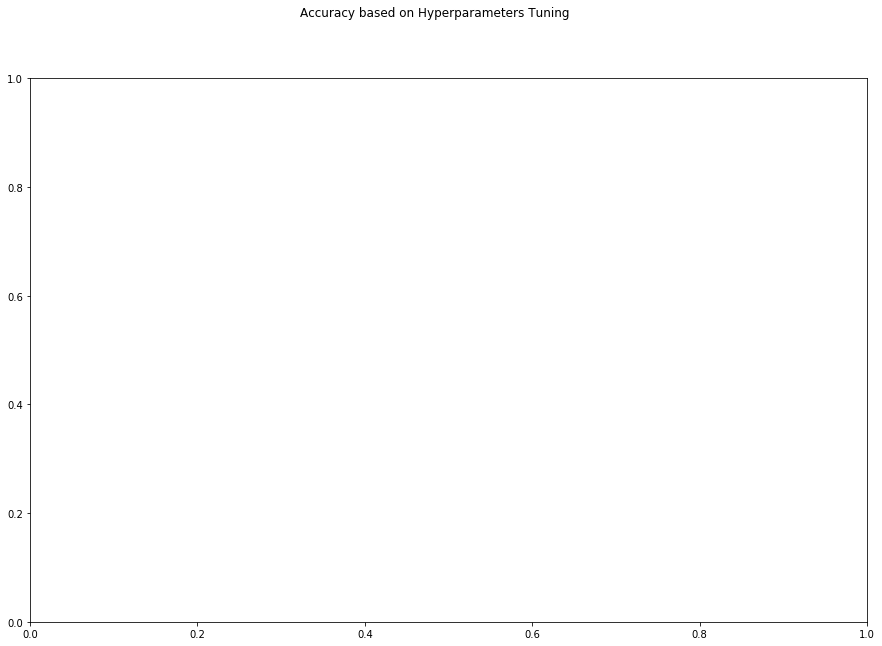

In [23]:
%%time
boosted_tree_best_n_estimators = valop.get_best_boosted_tree_n_estimators(dataframe, tree_best_features)

Wall time: 9.47 s


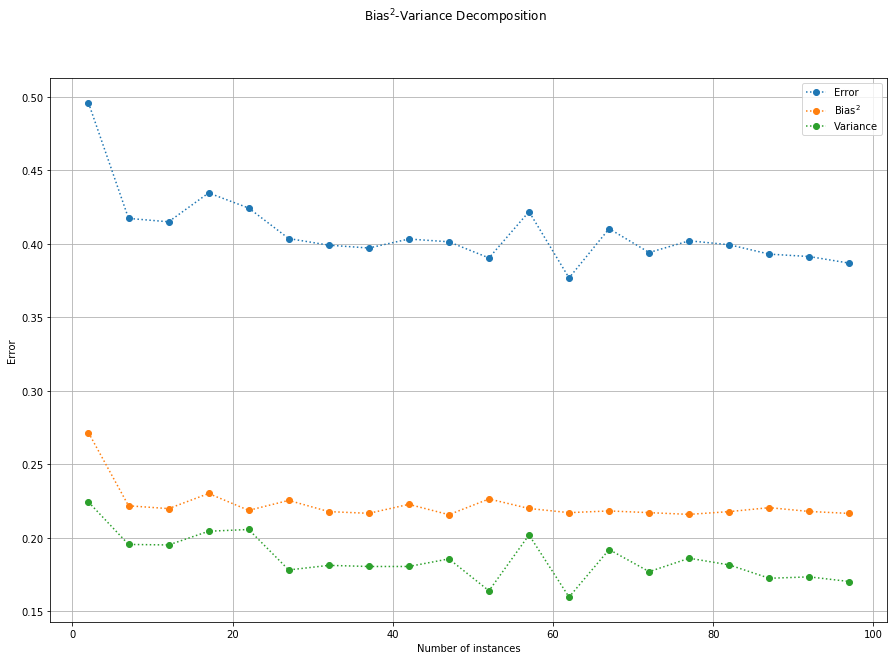

In [12]:
%%time
from sklearn.ensemble import AdaBoostClassifier

valop.plot_estimator_variance_bias_decomposition(dataframe,
    AdaBoostClassifier(DecisionTreeClassifier(max_depth = tree_best_features['depth'],
                                                  max_features = tree_best_features['max_features']), 
                      n_estimators=boosted_tree_best_n_estimators), n_tests = 10)

# LA BIAS RIMANE PIù O MENO INVARIATA, IL TUNING DEGLI IPERPARAMETRI E' STATO EFFICIENTE

Best Estimators Number 275 - Accuracy: 0.7422121106055303
Best Depth 17 - Accuracy: 0.7421537743553844
Wall time: 3min 16s


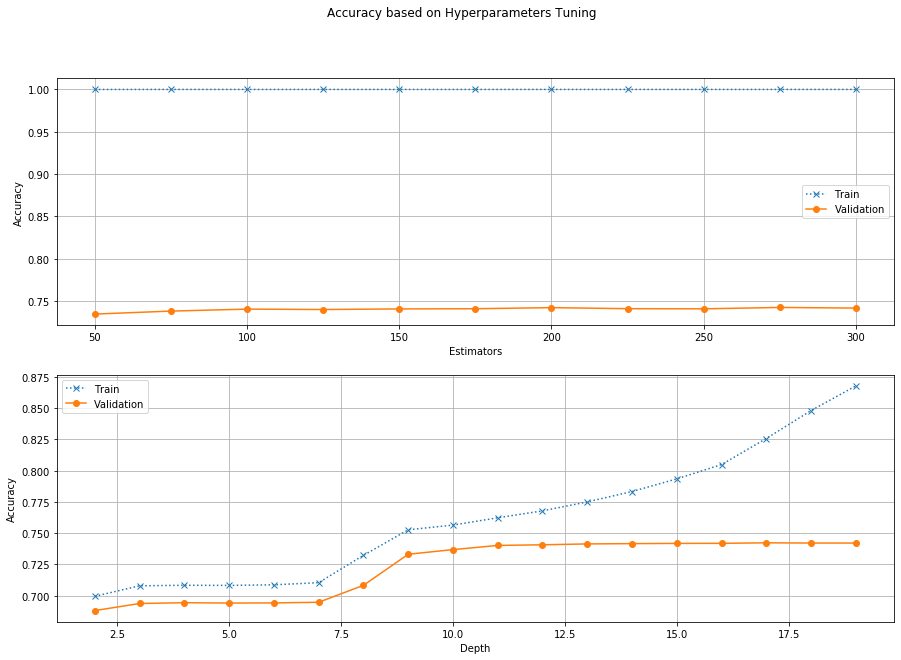

In [24]:
%%time
forest_best_features = valop.validate_forest_classifier(dataframe)

#Miglioramento dell'accuratezza! Con l'aumento della depth, foresta più fully grown migliora l'accuratezza al contrario di quanto accadeva
#all'inizio!

In [5]:
%%time
from sklearn.ensemble import RandomForestClassifier
valop.plot_estimator_variance_bias_decomposition(dataframe,
                                           RandomForestClassifier(n_estimators = forest_best_features['n_estimators']),
                                                                  n_tests = 3)

# LA BIAS CRESCE DI POCO, FORSE QUESTO PORTA AD UN PEGGIORAMENTO DELL'ACCURATEZZA

NameError: name 'forest_best_features' is not defined

Wall time: 34.1 s


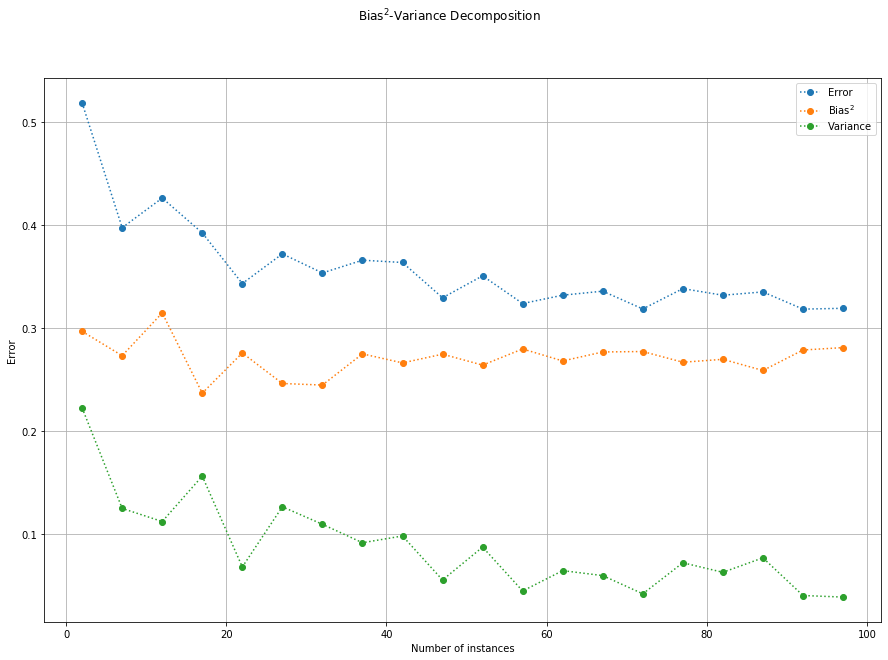

In [14]:
%%time
valop.plot_estimator_variance_bias_decomposition(dataframe,
                                                 RandomForestClassifier(n_estimators = forest_best_features['n_estimators'],
                                                                 max_depth = forest_best_features['max_depth']),
                                                                  n_tests = 3)

# LA FORESTA COL TUNING DEI PARAMETRI PORTA AD UN RISULTATO SIMILE RISPETTO ALL'ALBERO, PROBABILMENTE PERCHé LA BIAS CRESCE UN PO'
# MENTRE LA VARIANZA DIMINUISCE

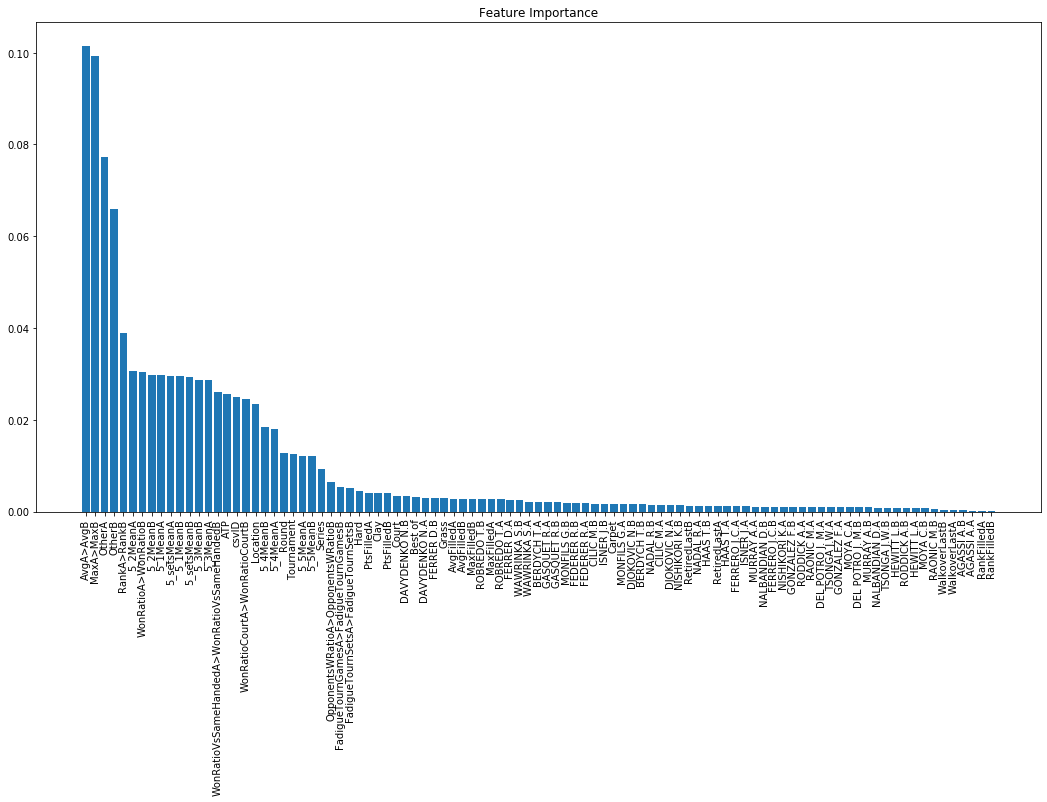

Wall time: 29.2 s


In [8]:
%%time

import matplotlib.pyplot as plt

x = dataframe.loc[:, dataframe.columns != 'Winner']
y = dataframe['Winner']

rf = RandomForestClassifier(n_estimators = forest_best_features['n_estimators'], max_depth = forest_best_features['max_depth'])

rf.fit(x,y)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = [x.columns[i] for i in indices]

plt.figure(figsize=(18,9))
plt.title("Feature Importance")
plt.bar(range(x.shape[1]), importances[indices])
plt.xticks(range(x.shape[1]), features, rotation=90)
plt.show()

In [10]:
%%time
from sklearn.feature_selection import RFE

#df = df.head(1000)



selector = RFE(rf, step=10, n_features_to_select=None)

selector.fit(x,y)
selector.support_

Wall time: 2min 43s


array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [11]:
features = x.columns.values[selector.support_]

features = np.append(features,['Winner'])

print('Selected features (total:', dataframe.shape[1], ')-> ', len(features))
print(features)

Selected features (total: 98 )->  49
['csvID' 'ATP' 'Location' 'Tournament' 'Series' 'Court' 'Round' 'Best of'
 'PtsFilledA' 'PtsFilledB' 'MaxFilledA' 'MaxFilledB' 'AvgFilledA'
 'AvgFilledB' 'Clay' 'Grass' 'Hard' 'FERRER D.A' 'FERRER D.B'
 'WAWRINKA S.A' 'WAWRINKA S.B' 'ROBREDO T.A' 'ROBREDO T.B' 'DAVYDENKO N.A'
 'DAVYDENKO N.B' 'OtherA' 'OtherB' 'RankA>RankB' 'MaxA>MaxB' 'AvgA>AvgB'
 'OpponentsWRatioA>OpponentsWRatioB'
 'FadigueTournGamesA>FadigueTournGamesB'
 'FadigueTournSetsA>FadigueTournSetsB' 'WonRatioA>WonRatioB'
 'WonRatioCourtA>WonRatioCourtB' '5_1MeanA' '5_2MeanA' '5_3MeanA'
 '5_4MeanA' '5_5MeanA' '5_setsMeanA' '5_1MeanB' '5_2MeanB' '5_3MeanB'
 '5_4MeanB' '5_5MeanB' '5_setsMeanB'
 'WonRatioVsSameHandedA>WonRatioVsSameHandedB' 'Winner']


Best Estimators Number 175 - Accuracy: 0.7409287131023218
Best Depth 14 - Accuracy: 0.7419787656049469
Wall time: 2min 6s


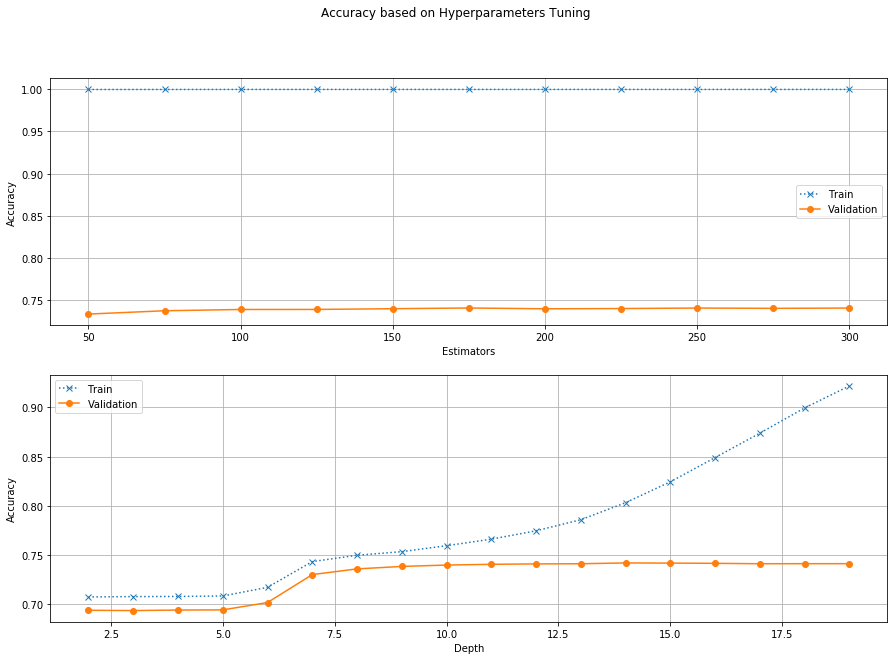

In [12]:
%%time
recursive_forest_best_features = valop.validate_forest_classifier(dataframe[features])

In [ ]:
'''from sklearn.feature_selection import RFE

rf_small = RandomForestClassifier(n_estimators=20)
selector = RFE(rf_small, 
                 step=1, # features removed at each step
                 n_features_to_select=1 # selected features
                )
fit = selector.fit(dataframe.loc[:, dataframe.columns != 'Winner'],  
                                                        dataframe['Winner'])
                                                        '''

In [ ]:
#accuracy_score(y_true=dataframe['Winner'], y_pred=rf.predict(fit.predict(dataframe.loc[:, dataframe.columns != 'Winner'])))